In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cookies = pd.read_csv('clean_cookies.csv')

During data cleaning we identified some potential outliers, these are the ones we will drop first

# pH

/home/atwenter/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


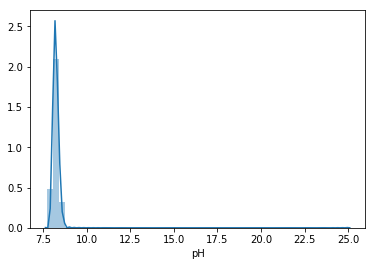

In [4]:
sns.distplot(cookies['pH'])

In [5]:
cookies['pH'].describe()

count    5175.000000
mean        8.222066
std         0.283779
min         7.720000
25%         8.110000
50%         8.210000
75%         8.320000
max        25.000000
Name: pH, dtype: float64

In [6]:
cookies = cookies[cookies['pH'] < 10]

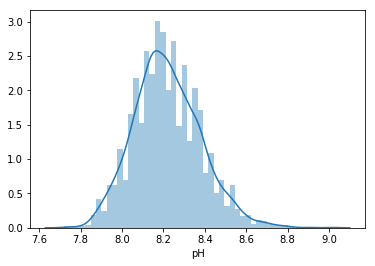

In [7]:
sns.distplot(cookies['pH'])

# Bake temp

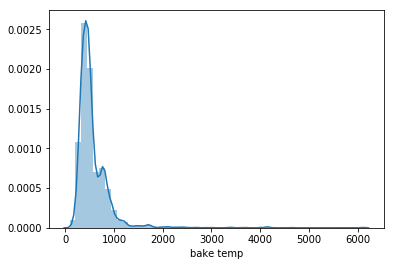

In [8]:
sns.distplot(cookies['bake temp'])

In [9]:
cookies['bake temp'].describe()

count    5174.000000
mean      559.698492
std       353.455432
min        90.000000
25%       380.000000
50%       470.000000
75%       640.000000
max      6110.000000
Name: bake temp, dtype: float64

As there are many very large values and we can't determine if this is a value intpu mistake, we will consider outliers all values over 5*std dev

In [10]:
limit = cookies['bake temp'].mean() + cookies['bake temp'].std()*5

In [11]:
cookies = cookies[cookies['bake temp'] < limit]

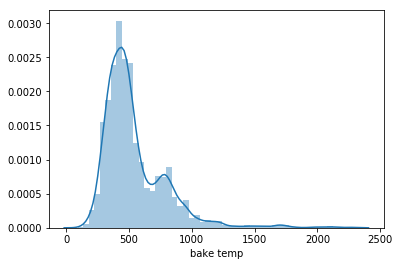

In [12]:
sns.distplot(cookies['bake temp'])

# Density

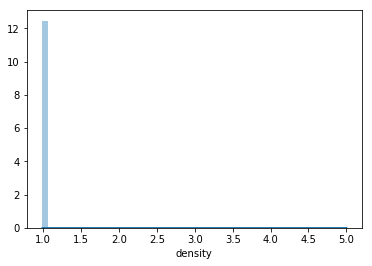

In [13]:
sns.distplot(cookies['density'])

In [14]:
cookies['density'].describe()

count    5142.000000
mean        0.995426
std         0.055934
min         0.987110
25%         0.992280
50%         0.994800
75%         0.996900
max         5.000000
Name: density, dtype: float64

In [15]:
cookies = cookies[cookies['density'] < 3]

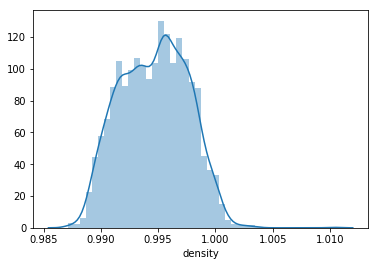

In [16]:
sns.distplot(cookies['density'])

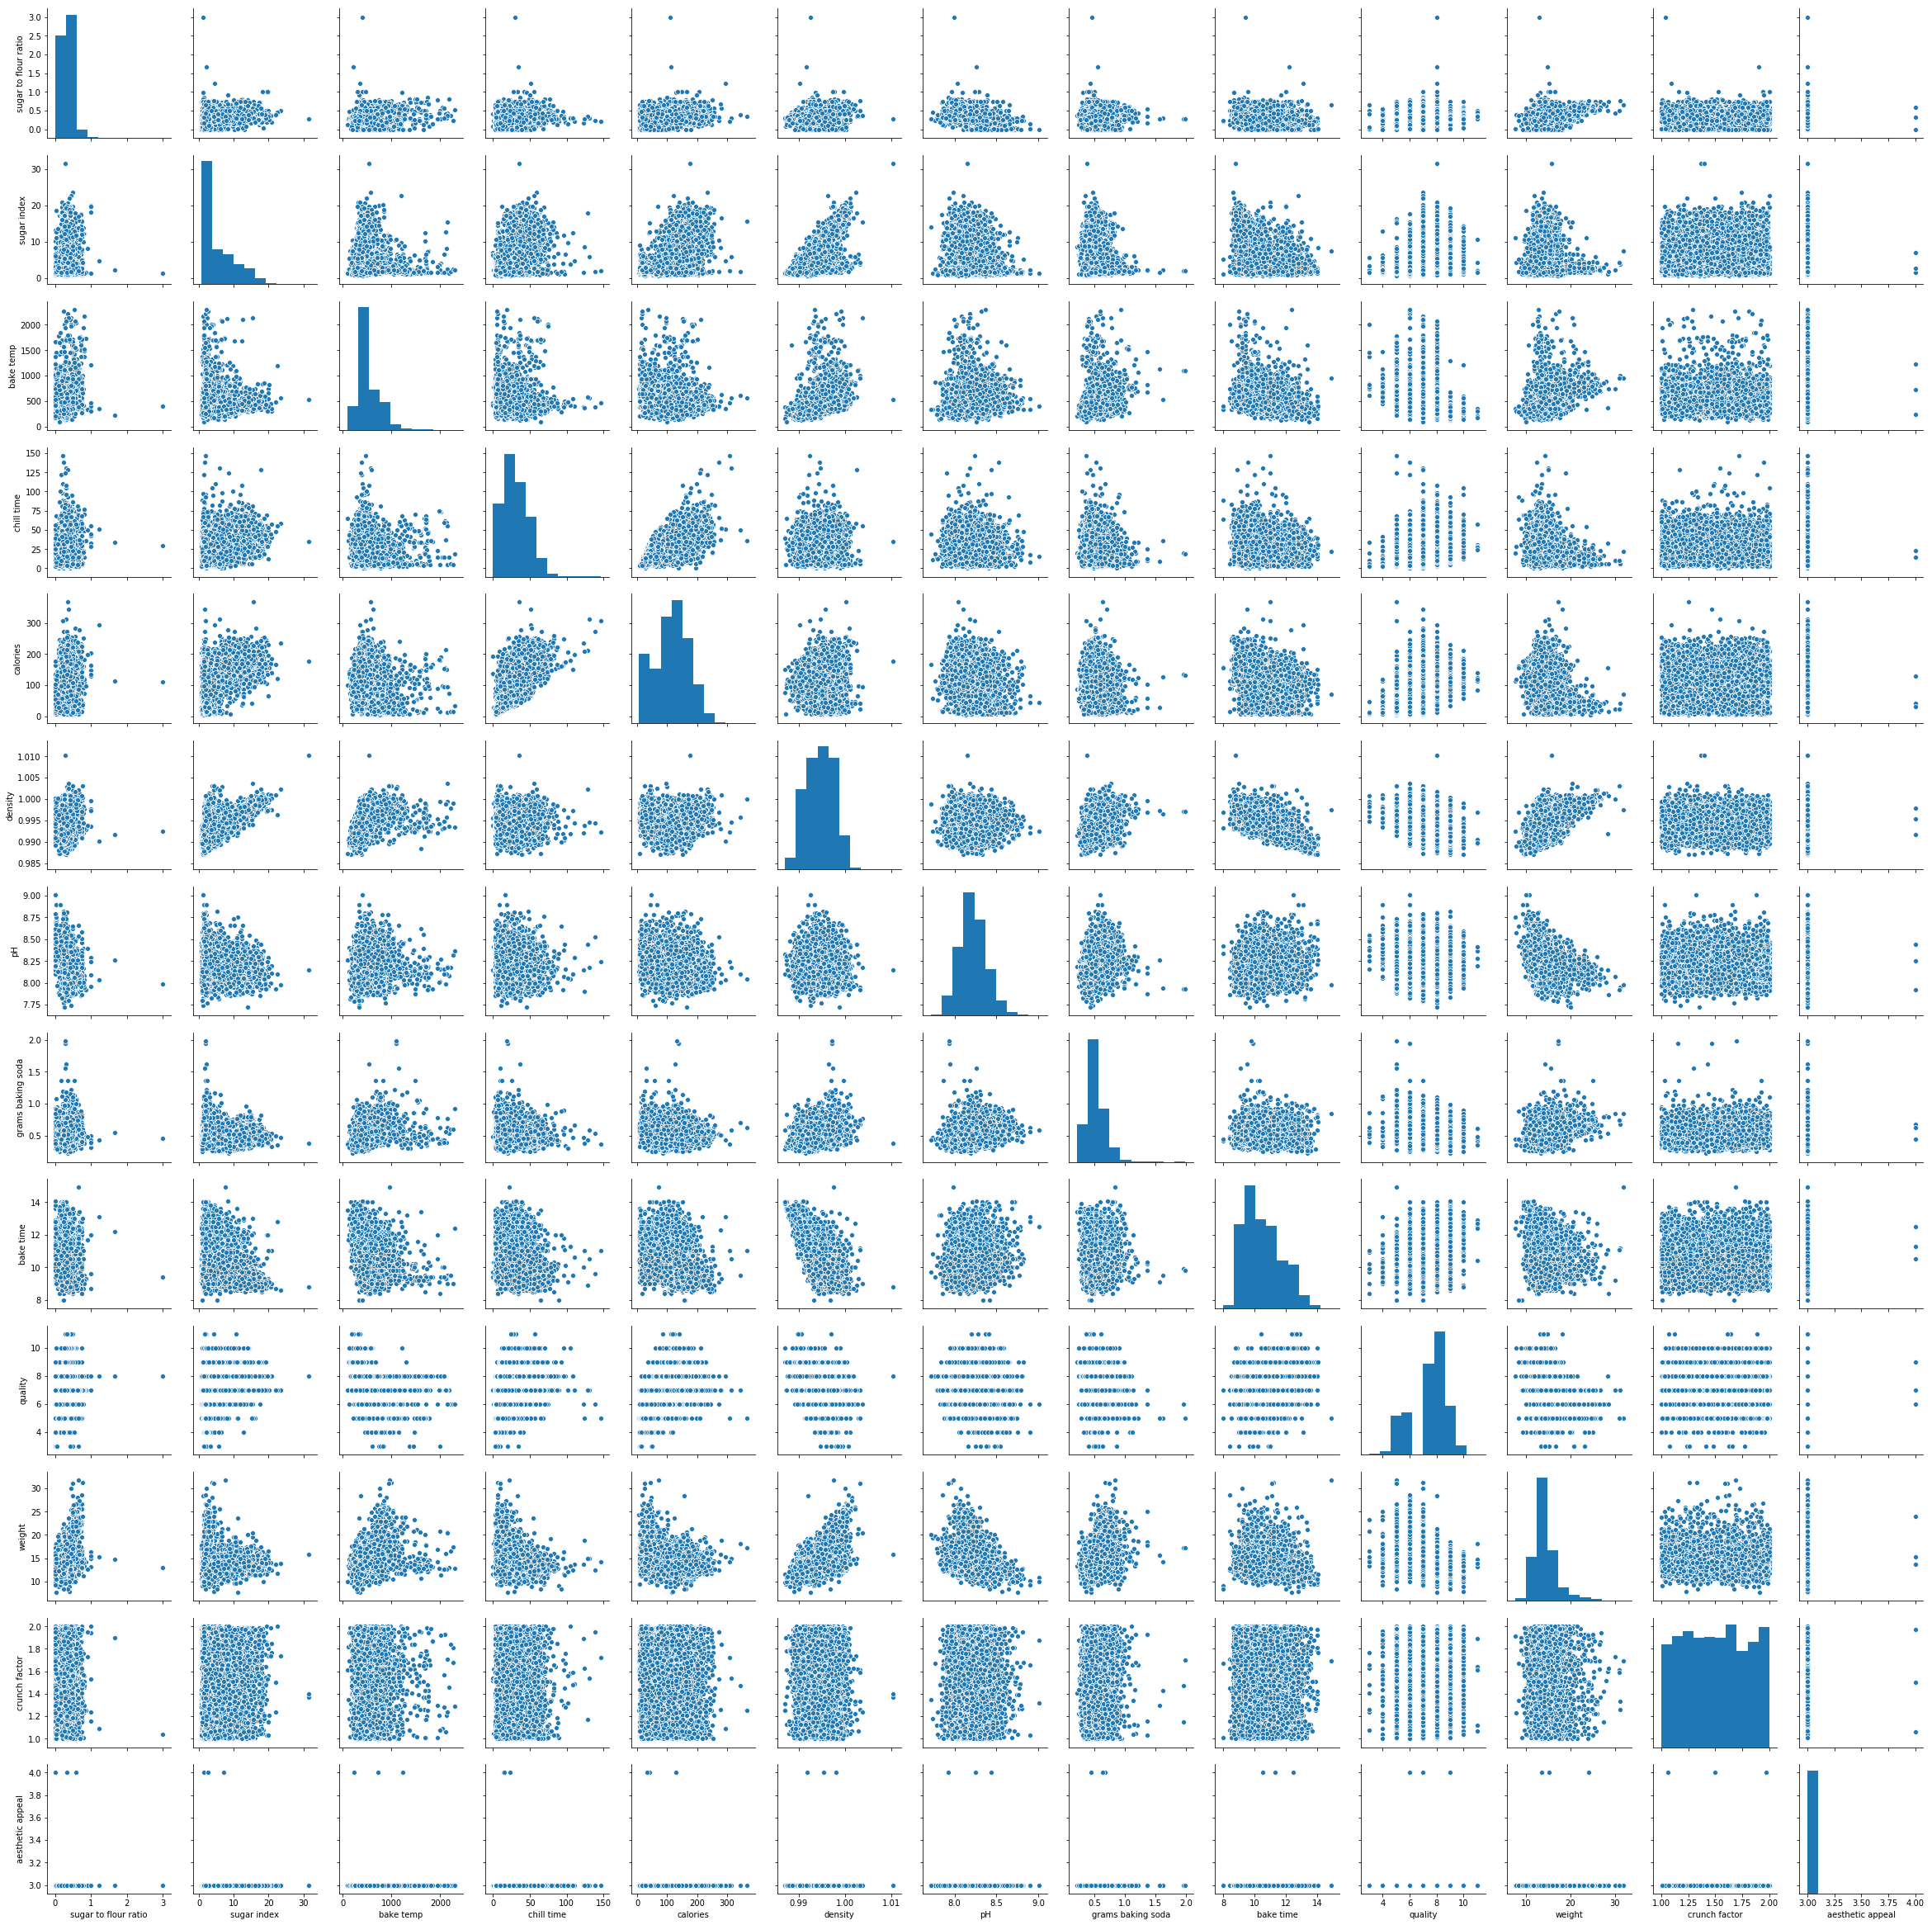

In [17]:
cols = list(cookies.columns[1:14])
sns.pairplot(cookies[cols])

We can see a potential outlier in 'sugar to flour ratio'

# Sugar to flour ratio

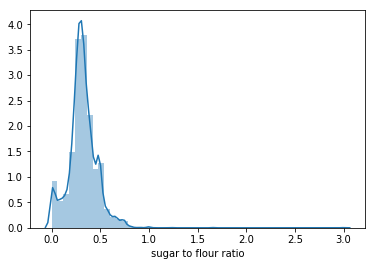

In [18]:
sns.distplot(cookies['sugar to flour ratio'])

In [19]:
cookies['sugar to flour ratio'].describe()

count    5141.000000
mean        0.317273
std         0.149293
min         0.000000
25%         0.240000
50%         0.310000
75%         0.390000
max         3.000000
Name: sugar to flour ratio, dtype: float64

In [20]:
cookies = cookies[cookies['sugar to flour ratio'] < 1.2]

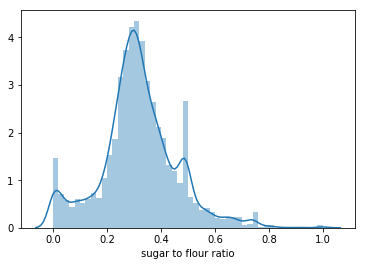

In [21]:
sns.distplot(cookies['sugar to flour ratio'])

## Finally, we look at the correlation between variables

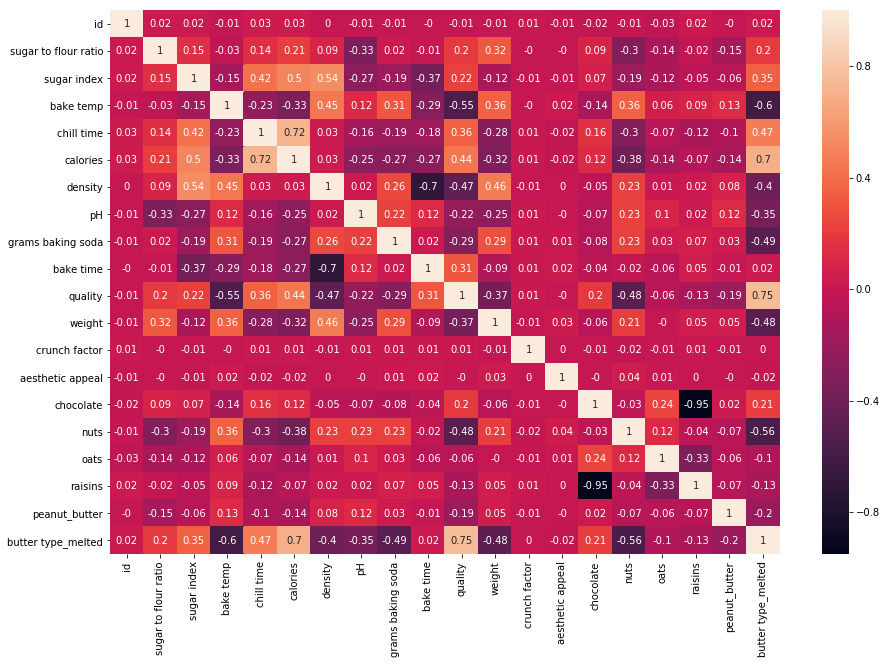

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cookies.corr(), 2), annot= True)

### We decided to drop crunch factor and aesthetic appeal as they don't have any influence over quality.

In [28]:
cookies = cookies.drop(columns=['crunch factor', 'aesthetic appeal'])

In [29]:
cookies.to_csv('clean_cookies_outlier.csv', index=False)

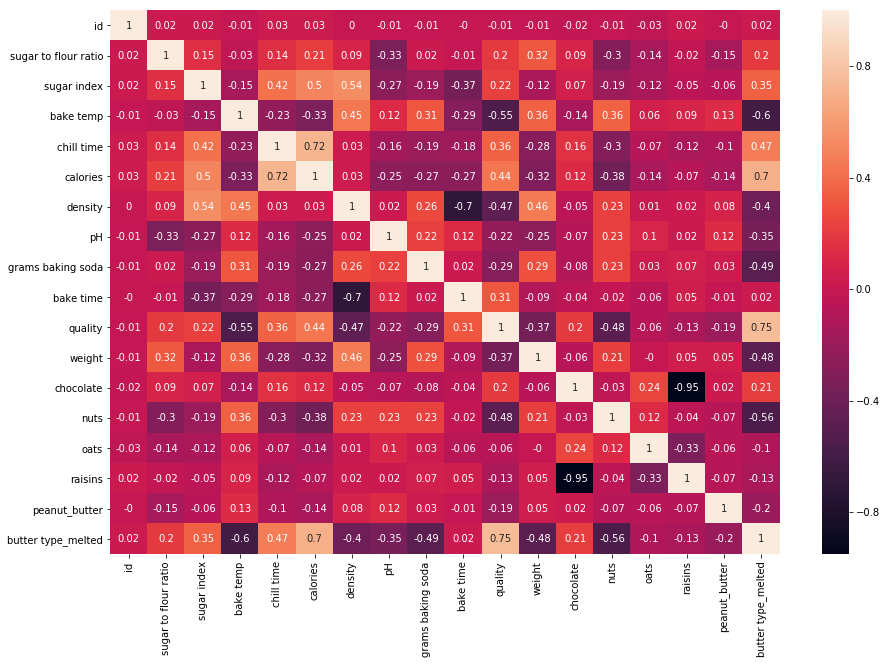

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cookies.corr(), 2), annot= True)

In [32]:
cookies.columns

Index(['id', 'sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'weight', 'chocolate', 'nuts', 'oats', 'raisins',
       'peanut_butter', 'butter type_melted'],
      dtype='object')

In [ ]:
### We remove even more columns and only take the ones that correlate most with quality

In [34]:
cookies = cookies[[ 'bake temp', 'chill time',
       'calories', 'density',
       'quality', 'weight', 'nuts', 'butter type_melted']]

In [36]:
cookies.to_csv('clean_cookies_outlier.csv', index=False)

In [35]:
cookies

,bake temp,chill time,calories,density,quality,weight,nuts,butter type_melted
0,300,15.0,136.0,0.99367,8,15.2,0,1
1,520,34.0,113.0,0.99429,7,12.4,0,1
2,360,33.0,106.0,0.98746,9,9.4,1,1
3,490,41.0,124.0,0.99630,7,12.2,0,1
4,770,6.0,33.0,0.99740,5,19.8,1,0
5,500,23.0,139.0,0.99904,7,13.2,0,1
6,410,31.0,102.0,0.99221,9,13.2,0,1
7,440,30.0,180.0,0.99410,9,15.2,0,1
8,700,13.0,40.0,0.99700,5,14.2,1,0
9,330,59.0,186.0,0.99754,7,13.8,1,1
